In [ ]:

import pandas as pd
import numpy as np

#Plot dos gráficos
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

# Algoritmos de Agrupamento
from sklearn.cluster import KMeans, DBSCAN

# Avaliação de Desempenho
from sklearn.metrics import adjusted_rand_score, silhouette_score


**Storytelling**

Objetivo: Saber se o Indice da bolsa de valores Ibovespa vai fechar em queda ou em alta no dia seguinte.

Data: Dia regitrado na bolsa de valores
Último: Pontuação de fechamento
Abertura: Pontuação de abertura
Máxima: Pontuação máxima alcançada no dia
Vol. representação financeira
Var.% variação percentual
Volume representação financeira ajustada
Var_num calculo da abertura/fechamento-1
Direcao: a tendencia é de alta ou de baixa.  

| Coluna   | Tipo       | Descrição           |
| -------- | ---------- | ------------------- |
| Data     | Data       | Pregão              |
| Último   | Numérica   | Fechamento          |
| Abertura | Numérica   | Abertura do dia     |
| Máxima   | Numérica   | Máxima do dia       |
| Mínima   | Numérica   | Mínima do dia       |
| Volume   | Numérica   | Volume financeiro   |
| Var_num  | Numérica   | Variação percentual |
| Direcao  | Categórica | **Alta / Baixa**    |


**Metodologia**

Análise Preditiva com KNN (K-Nearest Neighbors) em Python é baseada em um método de aprendizado supervisionado que faz previsões a partir da similaridade entre observações.

In [ ]:
# Carregando e Inspecionando os dados.

df=pd.read_csv("/content/drive/MyDrive/Tech Challenger Fiap - Fase 2/(Volume ADD e DIR) Dados Históricos - Ibovespa 17.12.2015_17.12.2025 (1).csv", encoding='latin1', sep=';')
df.head()

,Data,Ultimo,Abertura,Maxima,Minima,Vol.,Var%,Volume,Var_num,Direcao
0,17122025,157327,158578,158611,156351,"11,34B","-0,0079","1,13E+11",-79,Baixa
1,16122025,158578,162482,162482,158558,"9,92B","-0,024",99200000000,-24,Baixa
2,15122025,162482,160766,163073,160766,"8,23B","0,0107",82300000000,107,Alta
3,12122025,160766,159189,161263,159189,"7,67B","0,0099",76700000000,99,Alta
4,11122025,159189,159072,15985,158098,"7,02B","0,0007",70200000000,7,Alta


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      2484 non-null   int64 
 1   Ultimo    2484 non-null   int64 
 2   Abertura  2484 non-null   int64 
 3   Maxima    2484 non-null   int64 
 4   Minima    2484 non-null   int64 
 5   Vol.      2483 non-null   object
 6   Var%      2484 non-null   object
 7   Volume    2483 non-null   object
 8   Var_num   2484 non-null   int64 
 9   Direcao   2484 non-null   object
dtypes: int64(6), object(4)
memory usage: 194.2+ KB


In [ ]:
df.isnull().sum()  # Porque temos um valor nulo??

,0
Data,0
Ultimo,0
Abertura,0
Maxima,0
Minima,0
Vol.,1
Var%,0
Volume,1
Var_num,0
Direcao,0


In [ ]:
df.shape

(2484, 10)

In [ ]:
df.describe()

,Data,Ultimo,Abertura,Maxima,Minima,Var_num
count,2.484000e+03,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000
mean,1.581988e+07,90490.286232,91131.435990,92144.043076,90842.080918,5.663849
std,8.747143e+06,38284.702137,37658.109495,37538.044785,36874.452795,137.927681
min,1.022016e+06,395.000000,449.000000,391.000000,449.000000,-1478.000000
25%,8.089518e+06,66867.750000,68353.000000,68630.500000,68242.500000,-55.250000
50%,1.604202e+07,101936.000000,102000.000000,103122.500000,101060.000000,4.000000
75%,2.309202e+07,118414.500000,118702.500000,119448.000000,117822.250000,72.000000
max,3.110202e+07,164456.000000,164461.000000,165036.000000,161759.000000,1391.000000


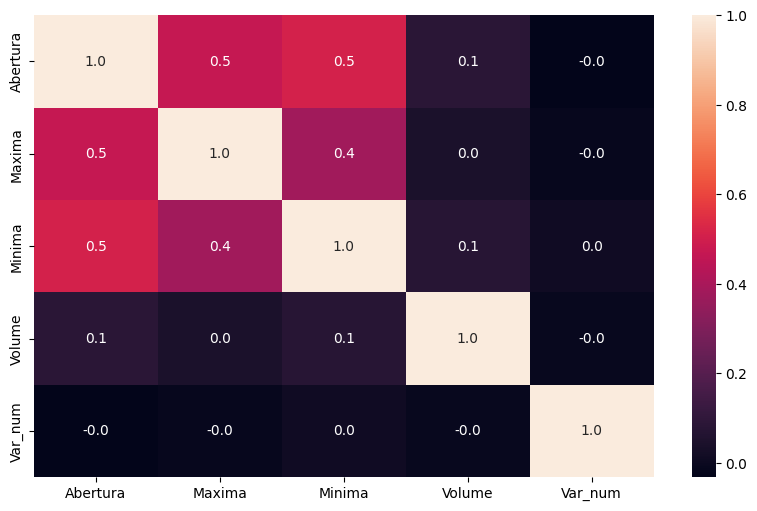

In [ ]:
# Analisando a correlação entre os dados

# Limpeza e conversão das colunas para numérico
# Verifica se a coluna é do tipo 'object' (string) antes de aplicar operações .str
if df['Volume'].dtype == 'object':
    df['Volume'] = df['Volume'].str.replace(',', '.', regex=False)
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
df['Volume'] = df['Volume'].fillna(0)

if df['Vol.'].dtype == 'object':
    df['Vol.'] = df['Vol.'].str.replace('B', '', regex=False) # Remove 'B' de Bilhões
    df['Vol.'] = df['Vol.'].str.replace(',', '.', regex=False)
df['Vol.'] = pd.to_numeric(df['Vol.'], errors='coerce')
df['Vol.'] = df['Vol.'].fillna(0)

if df['Var%'].dtype == 'object':
    df['Var%'] = df['Var%'].str.replace(',', '.', regex=False)
df['Var%'] = pd.to_numeric(df['Var%'], errors='coerce')
df['Var%'] = df['Var%'].fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(df[["Abertura", "Maxima", "Minima", "Volume", "Var_num"]].corr(method='pearson'), annot=True, fmt=".1f");

# Olhando a análise de correlação nenhuma tem uma correlação forte acima de 60%.

Trabalhando com a padronização ou normalização dos dados.

In [ ]:
# MinMaxScaler para normalizar as variáveis numéricas, ou seja, trazer todas as features para a mesma escala, geralmente entre 0 e 1.

from sklearn.preprocessing import StandardScaler, MinMaxScaler #Selecionando as variáveis númericas

#  Selecionado as colunas
features = ['Abertura', 'Maxima', 'Minima', 'Volume', 'Var_num']

# Inicializando o MinMaxScaler, objetivo é manter a proporção relativa boas práticas para usa no KNN
scaler = MinMaxScaler()

# Usando as features defindas no notebook
scaler.fit(df[features])

df_Escalonados = scaler.transform(df[features])
df_Escalonados

array([[9.64130673e-01, 9.60976647e-01, 9.66474490e-01, 6.68639053e-06,
        4.87626351e-01],
       [9.87933810e-01, 9.84487837e-01, 9.80156221e-01, 5.86982249e-06,
        5.06796793e-01],
       [9.77471161e-01, 9.88077379e-01, 9.93844151e-01, 4.86982249e-06,
        5.52457302e-01],
       ...,
       [2.64998903e-01, 2.66221264e-01, 2.64999070e-01, 2.10650888e-09,
        4.58696410e-01],
       [2.73150745e-01, 2.72452853e-01, 2.43010353e-02, 2.78698225e-09,
        4.11293133e-01],
       [2.71730117e-01, 2.78538674e-01, 2.76281694e-01, 1.84615385e-09,
        5.33983967e-01]])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

from sklearn.decomposition import PCA

# número inicial de componentes (bom ponto de partida)
pca = PCA(n_components=10)

X_train_pca = pca.fit_transform(X_train_s)
X_test_pca = pca.transform(X_test_s)

print("Dimensão original:", X_train_s.shape[1])
print("Dimensão após PCA:", X_train_pca.shape[1])

import numpy as np

explained = np.cumsum(pca.explained_variance_ratio_)
explained

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=7, metric="euclidean")
knn.fit(X_train_pca, y_train)

y_pred = knn.predict(X_test_pca)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("Matriz de confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório:\n", classification_report(y_test, y_pred))


In [ ]:
import pandas as pd

# se ainda não tiver, garanta que df_model existe com:
# ['Data', 'Abertura','Máxima','Mínima','Volume','Var_num','Direcao_bin']
features = ["Abertura", "Maxima", "Minima", "Volume", "Var_num"]

df_lag = df_model.copy()

# lags que vamos usar (ajuste como quiser)
lags = [1, 2, 3, 5, 10]

# cria colunas defasadas
for lag in lags:
    for col in features:
        df_lag[f"{col}_lag{lag}"] = df_lag[col].shift(lag)

# Target D+1: direção do próximo pregão (amanhã)
df_lag["target_D1"] = df_lag["Direcao_bin"].shift(-1)

# remove linhas com NaN (criadas pelos shifts)
df_lag = df_lag.dropna().copy()

# define X e y finais
features_lags = [f"{col}_lag{lag}" for lag in lags for col in features]
X = df_lag[features_lags]
y = df_lag["target_D1"].astype(int)

print("X shape:", X.shape)
print("y shape:", y.shape)
df_lag[["Data"] + features_lags + ["target_D1"]].head()

X shape: (2473, 25)
y shape: (2473,)


,Data,Abertura_lag1,Maxima_lag1,Minima_lag1,Volume_lag1,Var_num_lag1,Abertura_lag2,Maxima_lag2,Minima_lag2,Volume_lag2,...,Maxima_lag5,Minima_lag5,Volume_lag5,Var_num_lag5,Abertura_lag10,Maxima_lag10,Minima_lag10,Volume_lag10,Var_num_lag10,target_D1
10,3122025,16176.0,164551.0,161759.0,1.060000e+11,167.0,164461.0,165036.0,157007.0,1.450000e+11,...,159691.0,157628.0,8.240000e+10,69.0,158578.0,158611.0,156351.0,1.130000e+11,-79.0,1.0
11,2122025,161094.0,161963.0,161093.0,8.290000e+15,41.0,16176.0,164551.0,161759.0,1.060000e+11,...,158851.0,155188.0,8.700000e+10,-13.0,162482.0,162482.0,158558.0,9.920000e+10,-24.0,0.0
12,1122025,158612.0,161092.0,158612.0,8.430000e+10,156.0,161094.0,161963.0,161093.0,8.290000e+15,...,159235.0,157369.0,9.020000e+10,52.0,160766.0,163073.0,160766.0,8.230000e+10,107.0,1.0
13,28112025,159073.0,159224.0,158029.0,7.500000e+10,-29.0,158612.0,161092.0,158612.0,8.430000e+10,...,165036.0,157007.0,1.450000e+11,-431.0,159189.0,161263.0,159189.0,7.670000e+10,99.0,0.0
14,27112025,158358.0,159689.0,158078.0,8.020000e+10,45.0,159073.0,159224.0,158029.0,7.500000e+10,...,164551.0,161759.0,1.060000e+11,167.0,159072.0,15985.0,158098.0,7.020000e+10,7.0,1.0


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_s)
X_test_pca = pca.transform(X_test_s)

knn.fit(X_train_pca, y_train)



KNeighborsClassifier(n_neighbors=25)

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Split Temporal + Scaler realizando a base teste e base treino

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, shuffle=False)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# modelo
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(X_train_s, y_train)

# previsões
y_pred = knn.predict(X_test_s)

# avaliação
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Matriz de confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório:\n", classification_report(y_test, y_pred))


Acurácia: 0.5188679245283019
Matriz de confusão:
 [[153 185]
 [172 232]]

Relatório:
               precision    recall  f1-score   support

           0       0.47      0.45      0.46       338
           1       0.56      0.57      0.57       404

    accuracy                           0.52       742
   macro avg       0.51      0.51      0.51       742
weighted avg       0.52      0.52      0.52       742



In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score

resultados = []
for k in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_s, y_train)
    y_pred_k = knn.predict(X_test_s)
    acc = accuracy_score(y_test, y_pred_k)
    resultados.append((k, acc))

df_k = pd.DataFrame(resultados, columns=["K", "Acuracia"]).sort_values("Acuracia", ascending=False)
df_k.head(10)


,K,Acuracia
19,20,0.528302
22,23,0.526954
18,19,0.522911
21,22,0.522911
20,21,0.520216
6,7,0.518868
23,24,0.517520
8,9,0.510782
24,25,0.506739
16,17,0.505391


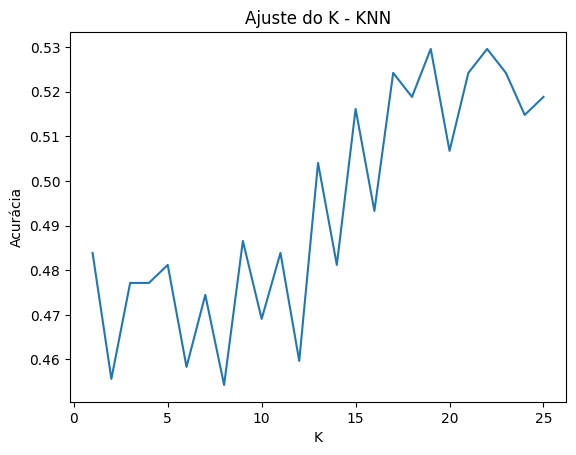

In [ ]:
import matplotlib.pyplot as plt

df_plot = pd.DataFrame(resultados, columns=["K", "Acuracia"])
plt.figure()
plt.plot(df_plot["K"], df_plot["Acuracia"])
plt.xlabel("K")
plt.ylabel("Acurácia")
plt.title("Ajuste do K - KNN")
plt.show()


In [ ]:
# Fazendo um novo teste

# Utilizando um modelo realista para prever D+1 utilizando um LAG (LAG é usar o passado para explicar o futuro)
#Vou criar df_model como uma cópia do seu DataFrame df existente e adicionar uma coluna Direcao_bin que binariza a coluna Direcao,
##transformando 'Baixa' em 0 e 'Alta' em 1. Essa etapa é crucial para preparar os dados para o modelo de machine learning.

df_model = df.copy()
# Binariza a coluna 'Direcao': 0 para 'Baixa' e 1 para 'Alta'
df_model['Direcao_bin'] = df_model['Direcao'].apply(lambda x: 0 if x == 'Baixa' else 1)
df_lag = df_model.copy()

# cria lag1 para cada feature
for col in features:
    df_lag[f"{col}_lag1"] = df_lag[col].shift(1)

# target: direção do dia atual (que será D+1 em relação ao lag)
df_lag["target_D1"] = df_lag["Direcao_bin"]

# remove linha inicial com NaN do shift
df_lag = df_lag.dropna().copy()

features_lag1 = [f"{c}_lag1" for c in features]
X_lag1 = df_lag[features_lag1]
y_lag1 = df_lag["target_D1"]

results = []

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split e escalonamento para os dados de lag1
X_train_current, X_test_current, y_train_current, y_test_current = train_test_split(
    X_lag1, y_lag1, test_size=0.3, shuffle=False
)

schaler_current = StandardScaler()
X_train_s_current = schaler_current.fit_transform(X_train_current)
X_test_s_current = schaler_current.transform(X_test_current)

# Ajustando a lista de n_components para não exceder o número de features (5)
for n in [1, 2, 3, 4, 5]: # Alterado de [5, 8, 10, 12, 15]
    pca = PCA(n_components=n)
    X_tr = pca.fit_transform(X_train_s_current)
    X_te = pca.transform(X_test_s_current)

    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(X_tr, y_train_current)
    pred = knn.predict(X_te)

    acc = accuracy_score(y_test_current, pred)
    results.append((n, acc))

import pandas as pd
print(pd.DataFrame(results, columns=["Componentes_PCA", "Acuracia"]).sort_values(
    "Acuracia", ascending=False
))

   Componentes_PCA  Acuracia
0                1  0.526174
2                3  0.519463
3                4  0.512752
4                5  0.506040
1                2  0.480537


**Conclusão**


Melhor resultado: 1 componente PCA (52,6%)

Acurácia melhor que antes, mas ainda fraca

Acurácia cai conforme aumentam os componentes

Existe um fator dominante, mas KNN não consegue explorá-lo bem.